In [19]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [20]:
file = Path("../Resources/clean3data.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,652,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,218,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,869,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,435,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,1,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [21]:
del df["Unnamed: 0"]
df.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [22]:
df2 = df[(df["Year"]>= 2019) & (df["Year"] <= 2019)]
df2.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
7,2019,Algeria,670000000,140000000,2371000,171760290068,42705368
10,2019,Andorra,187000000,1910000000,8235000,3155149347,76343
14,2019,Angola,717000000,395000000,218000,69309110145,32353588
15,2019,Antigua and Barbuda,119000000,992000000,1035000,1675403703,92117


In [27]:
df3=df2.rename(columns={"Country Name":"Country",
                               "International Tourism Expenditures (US$)":"Expenditure",
                               "International Tourism Receipts (US$)":"Receipts",
                               "# of arrivals":"Arrivals",
                               "GDP (US$)":"GDP",
                               "Total Population":"Population"})

In [28]:
df3.dropna(how='any')
df3.count()

Year           124
Country        124
Expenditure    124
Receipts       124
Arrivals       124
GDP            124
Population     124
dtype: int64

In [29]:
# The corfuntion function was created to aid in creating multiple graphs 

In [35]:
def corfunction(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
    plt.grid
    labelx = abelx
    xlabel = labelx
    labely = abely
    ylabel = labely
    title1 = title2
    title = title1
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [36]:
###Question 1: What countries attract the most tourist?

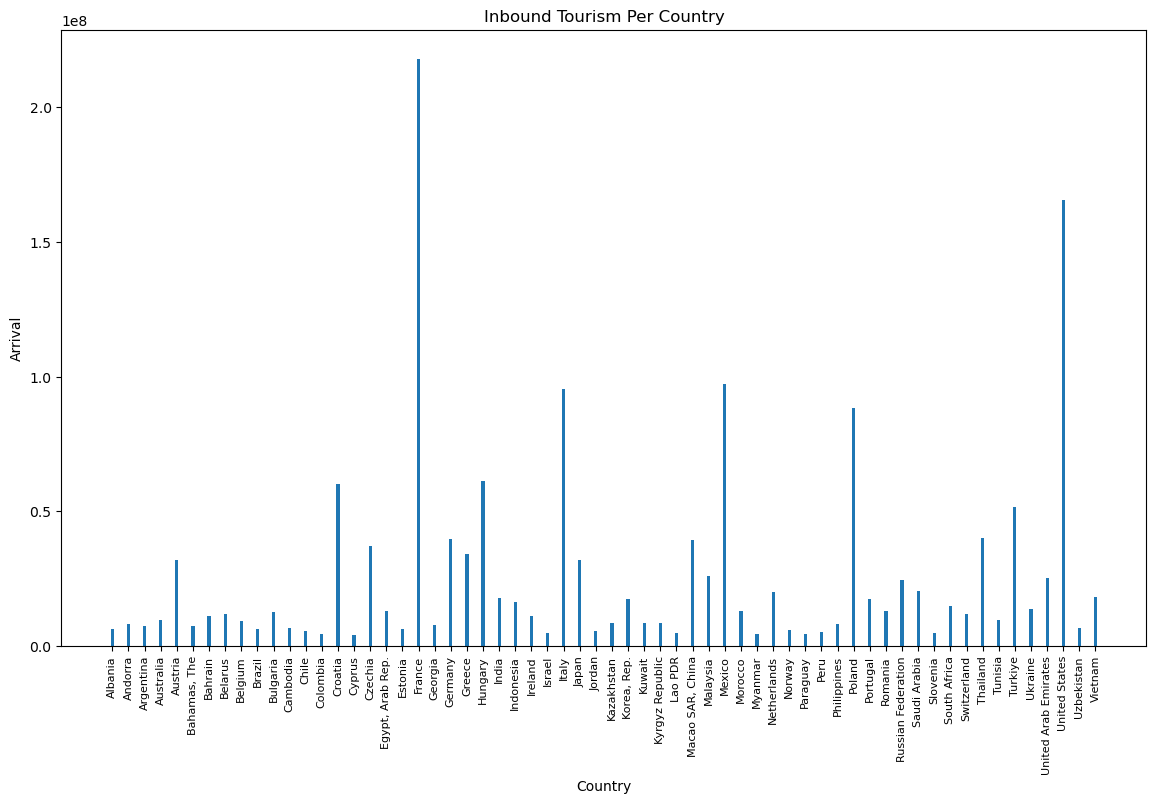

In [37]:
plt.figure(figsize=(14, 8))
ar = df3["Arrivals"].astype(int)
threshold = ar.median()
filtered_df = df3[ar > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country"]
bar_width = 0.2
plt.xlabel('Country')
plt.ylabel('Arrival')
plt.title('Inbound Tourism Per Country')
plt.bar(x_axis, filtered_df["Arrivals"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.savefig("../png/2019bar1.png")
plt.show()

In [39]:
top10 = df3["Arrivals"].median()
upper = df3[df3["Arrivals"] > top10]
top = upper.sort_values(by="Arrivals", ascending=False).head(10)
result10 = top[['Country', 'Arrivals']]
result10

,Country,Arrivals
226,France,217877000
633,United States,165478000
383,Mexico,97406000
297,Italy,95399000
476,Poland,88515000
272,Hungary,61397000
160,Croatia,60021000
612,Turkiye,51747000
587,Thailand,39916000
241,Germany,39563000


In [ ]:
#A Pie chart visualizing the top countries in 2019 by number of arrivals

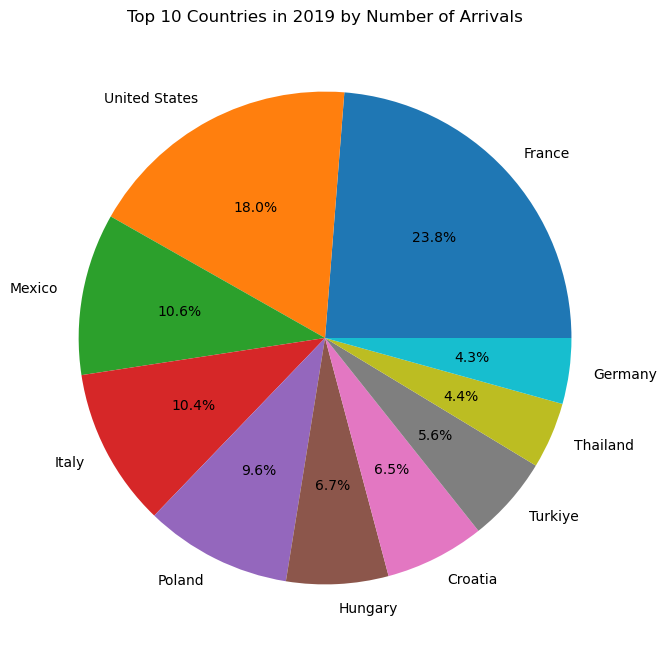

In [40]:
count = result10['Arrivals']
labels = result10['Country']
plt.figure(figsize=(8, 8))
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2019 by Number of Arrivals')
plt.savefig("../png/2019pie1.png")
plt.show()


In [ ]:
###Question 2: Which Countries have the highest receipt?

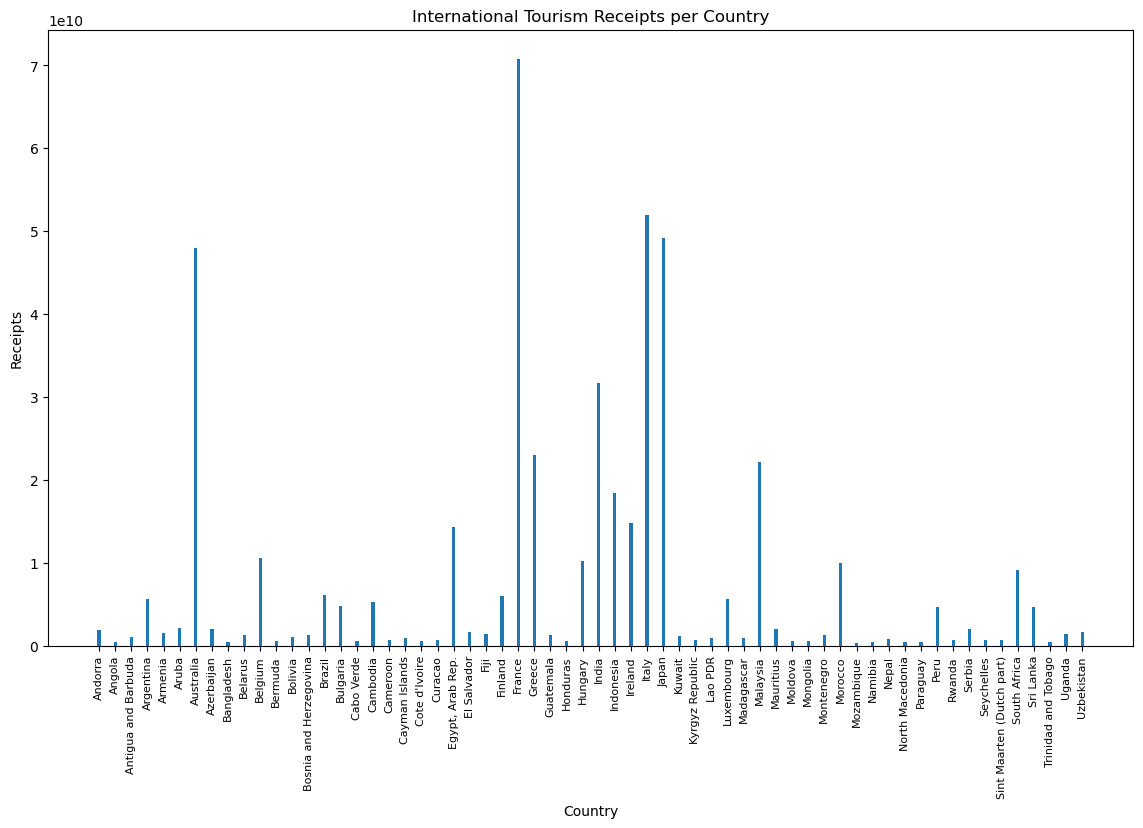

In [43]:
plt.figure(figsize=(14, 8))
reciepts = df3["Receipts"].astype(int)
threshold = reciepts.median()
filtered_df = df3[reciepts > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country"]
bar_width = 0.2
plt.xlabel('Country')
plt.ylabel('Receipts')
plt.title('International Tourism Receipts per Country')
plt.bar(x_axis, filtered_df["Receipts"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.savefig("../png/2019bar2.png")
plt.show()


In [42]:
top10reciepts = df3["Receipts"].median()
upperreciepts = df3[df3["Receipts"] > top10reciepts]
toprecieptsdf = upperreciepts.sort_values(by="Receipts", ascending=False).head(10)
recieptsresult10 = toprecieptsdf[["Country", "Receipts"]]
recieptsresult10

,Country,Receipts
633,United States,239447000000
226,France,70776000000
587,Thailand,64371000000
241,Germany,58372000000
297,Italy,51910000000
304,Japan,49209000000
33,Australia,47953000000
612,Turkiye,41415000000
347,"Macao SAR, China",41166000000
629,United Arab Emirates,38413300781


In [ ]:
# A pie chart visualizing the Top Tourism countries in 2019 per receipt 

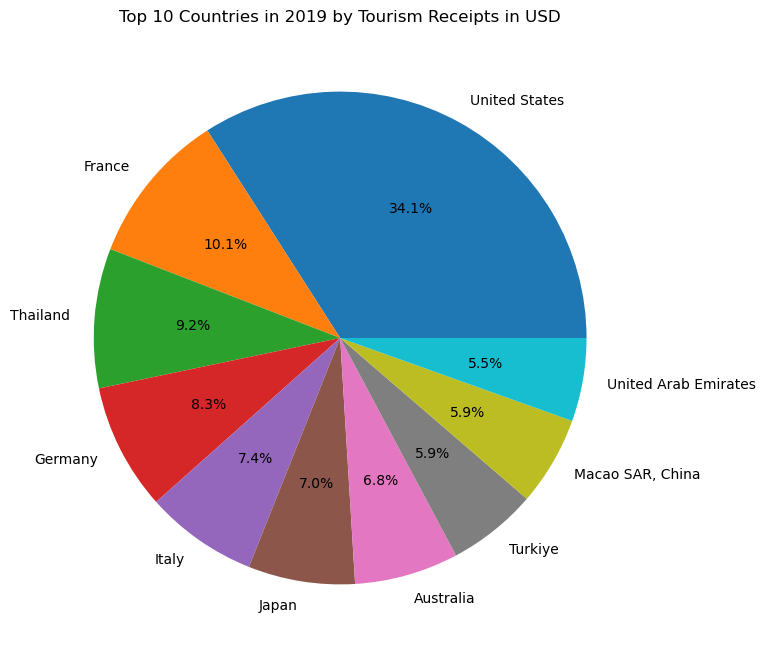

In [44]:
count2 = recieptsresult10["Receipts"]
labels2 = recieptsresult10['Country']
plt.figure(figsize=(8, 8))
plt.pie(count2, labels=labels2, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2019 by Tourism Receipts in USD')
plt.savefig("../png/2019pie2.png")
plt.show()


In [ ]:
###Question 3: Which Countries have the highest GDP

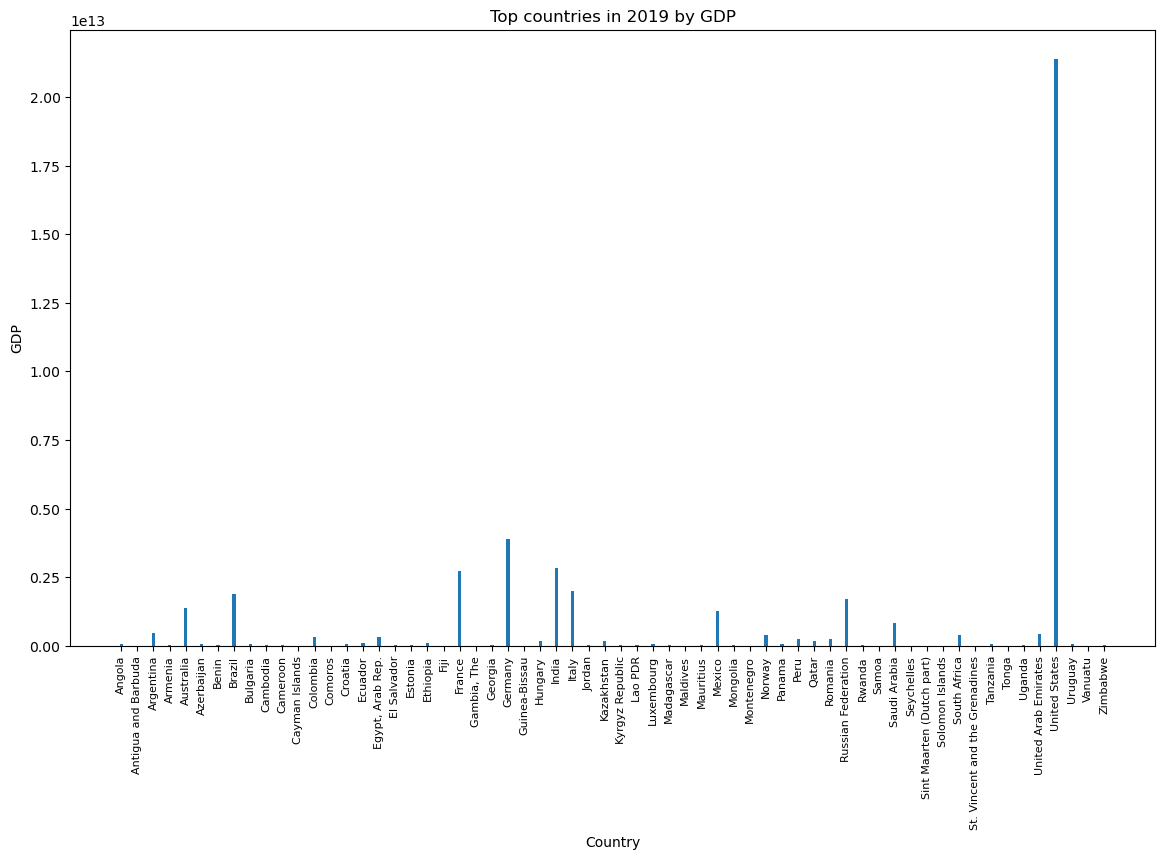

In [45]:
plt.figure(figsize=(14, 8))
gdp = df3["GDP"].astype(int)
threshold = gdp.median()
filtered_df = df3[gdp > threshold]
x_axis = np.arange(len(filtered_df))
labels = filtered_df["Country"]
bar_width = 0.2
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Top countries in 2019 by GDP') 
plt.bar(x_axis, filtered_df["GDP"], width=bar_width)
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.savefig("../png/2019bar3.png")
plt.show()

In [ ]:
# A pie chart visualizing the top countries in 2019 by GDP

In [49]:
top10gdp = df3["GDP"].median()
uppergdp = df3[df3["GDP"] > top10gdp]
top_gdp_df = uppergdp.sort_values(by="GDP", ascending=False).head(10)
gdp_result10 = top_gdp_df[["Country", "GDP"]]
gdp_result10

,Country,GDP
633,United States,21380976119000
304,Japan,5117993853016
241,Germany,3888226035921
277,India,2835606242052
226,France,2728870246705
297,Italy,2011302198827
100,Brazil,1873288159000
498,Russian Federation,1693114993990
317,"Korea, Rep.",1651422932447
33,Australia,1392218527563


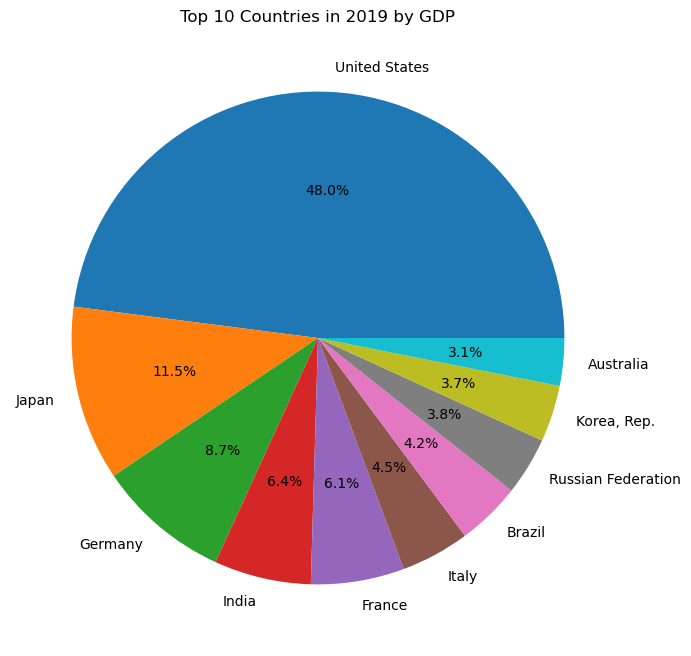

In [50]:
count3 = gdp_result10["GDP"]
labels3 = gdp_result10['Country']
plt.figure(figsize=(8, 8))
plt.pie(count3, labels=labels3, autopct='%1.1f%%')
plt.title('Top 10 Countries in 2019 by GDP')
plt.savefig("../png/2019pie3.png")
plt.show()


In [ ]:
###Question 4: What is the correlation?

In [ ]:
##Because the USA has such a huge impact on the rest of the dataset and analysis, its safe to use it as an outlier so we can better understand our data. 

In [52]:
df_filtered = df3[df3["Country"] != "United States"]

In [ ]:
##Correlation between GDP and Receipts for 2019: How Dependent International Receipts is on GDP in 2019

The r-value is: 0.7356571947396144


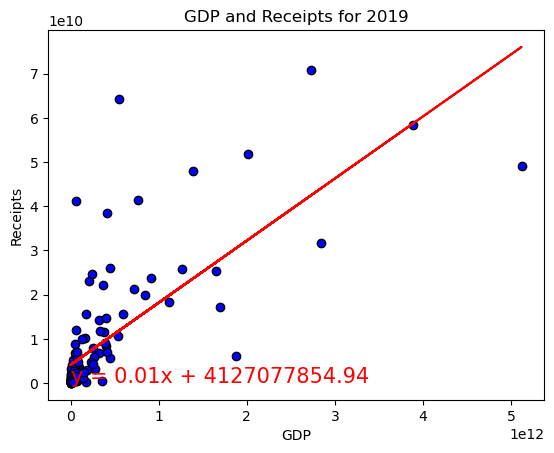

In [53]:
x = df_filtered["GDP"]
y = df_filtered["Receipts"]
abelx = "GDP"
abely = "Receipts"
title2 = "GDP and Receipts for 2019"
corfunction(x,y)
plt.savefig("../png/2019scatter1.png")

In [ ]:
##Correlation between number Inbound Tourism and GDP: How dependent Number of arrivals of Tourism is on GDP

The r-value is: 0.5010051265602029


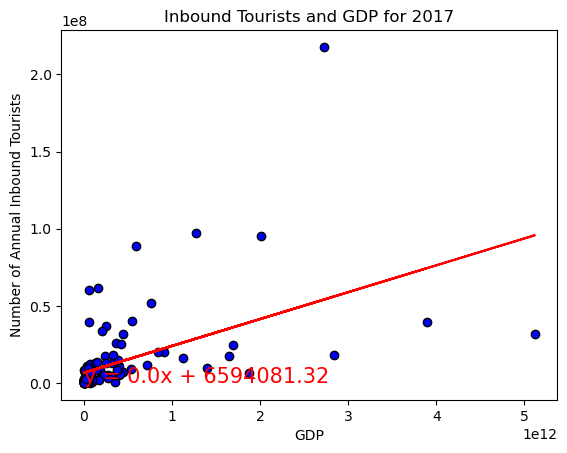

In [54]:
x = df_filtered["GDP"]
y = df_filtered["Arrivals"]
abelx = "GDP"
abely = "Number of Annual Inbound Tourists"
title2 = "Inbound Tourists and GDP for 2017"
corfunction(x,y)
plt.savefig("../png/2019scatter2.png")